## Save segment anything results

In [33]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

from utils import postprocess_per_volume, dsc_distribution, plot_dsc, gray2rgb, outline

In [34]:
image1 = cv2.imread('../images/model_comp_TCGA_DU_7014_19860618_y_true.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('../images/model_comp_TCGA_HT_7616_19940813_y_true.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [35]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "../weights/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

## Central point prompt

In [36]:
input_point = np.array([[112, 112]])
input_label = np.array([1])

In [37]:
predictor = SamPredictor(sam)
predictor.set_image(image1)

In [38]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   

In [39]:
masks_central, score_centrals, logits_central = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

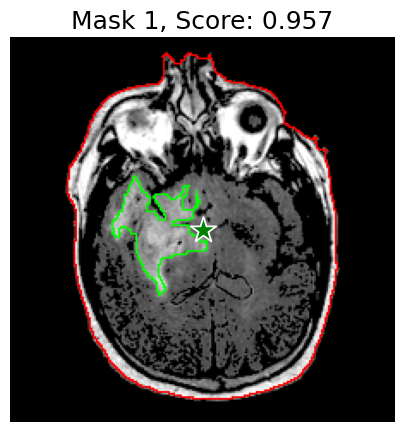

In [40]:
for i, (mask, score) in enumerate(zip(masks_central, score_centrals)):
    plt.figure(figsize=(5,5))
    
    # show_mask(mask, plt.gca())
    image1_masked = outline(image1, mask, color=[255, 0, 0])
    plt.imshow(image1_masked)
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

    plt.imsave("../images/model_comp_TCGA_DU_7014_19860618_SAM.png", image1_masked)

    break

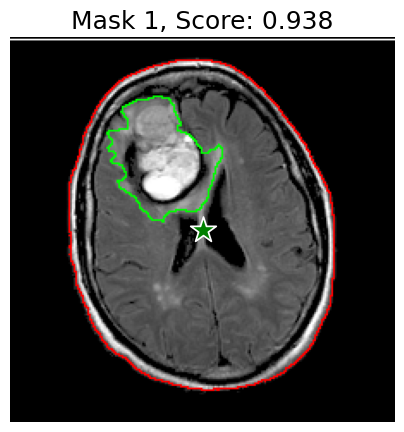

In [41]:
predictor = SamPredictor(sam)
predictor.set_image(image2)

masks_central, score_centrals, logits_central = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks_central, score_centrals)):
    plt.figure(figsize=(5,5))
    
    # show_mask(mask, plt.gca())
    image2_masked = outline(image2, mask, color=[255, 0, 0])
    plt.imshow(image2_masked)
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

    plt.imsave("../images/model_comp_TCGA_HT_7616_19940813_SAM.png", image2_masked)

    break

    